In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from src.pbn_gen import PbnGen

In [4]:
pbn = PbnGen("images/red_panda.jpg")
pbn.set_final_pbn()

Quantized to 10 colors
Starting pruning... 
Iteration (of 6): 1 2 3 4 5 6 
Done!


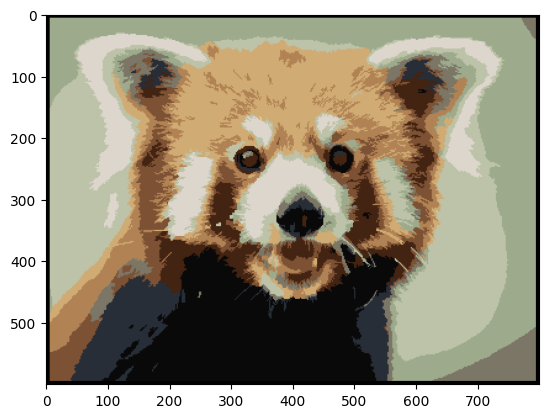

In [5]:
plt.imshow(pbn.getImage())

In [253]:
palette = pbn.output_to_svg("path.svg")

315 shapes


In [14]:
pbn.blurImage_(blurType='median')


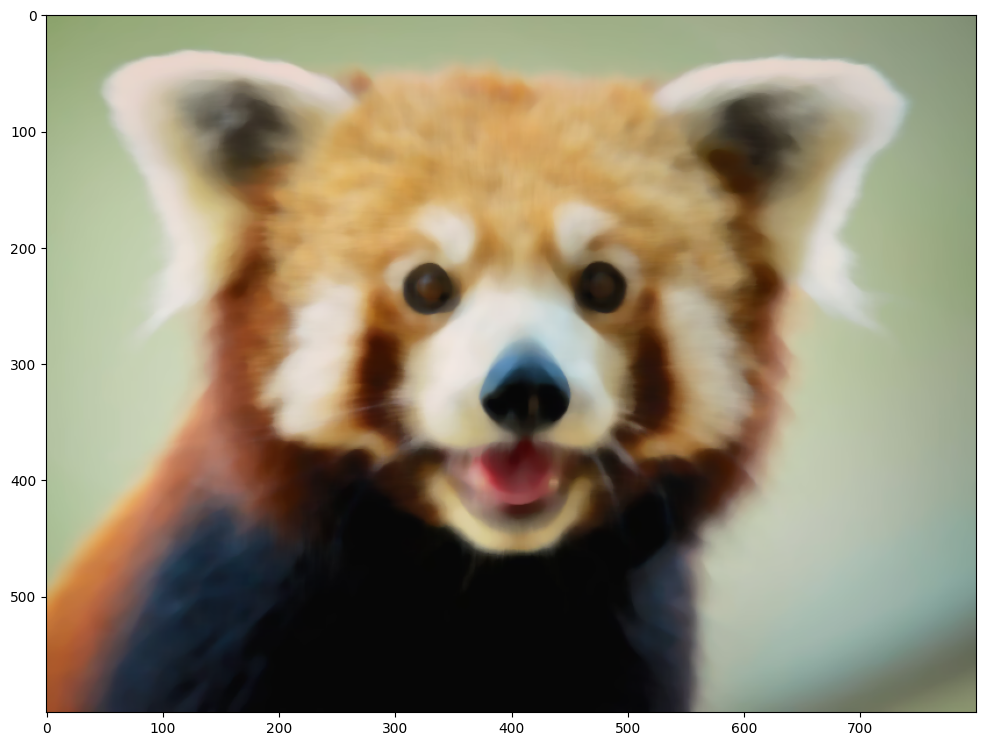

In [15]:
pbn.showImg()



In [16]:
colors, labels, q_img = pbn.cluster_colors()


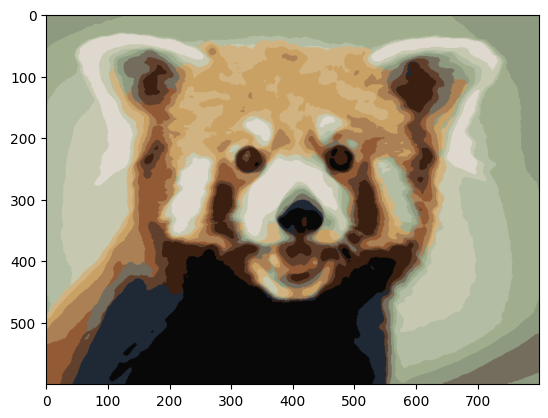

In [17]:
plt.imshow(q_img)

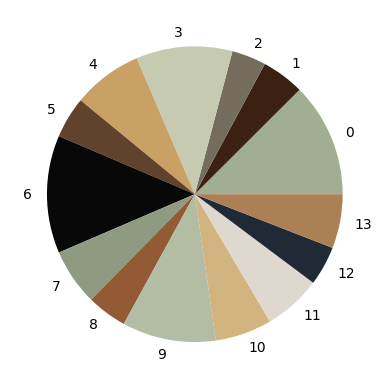

In [18]:
# make sure to run cluster colors first
pbn.plt_cluster_pie()

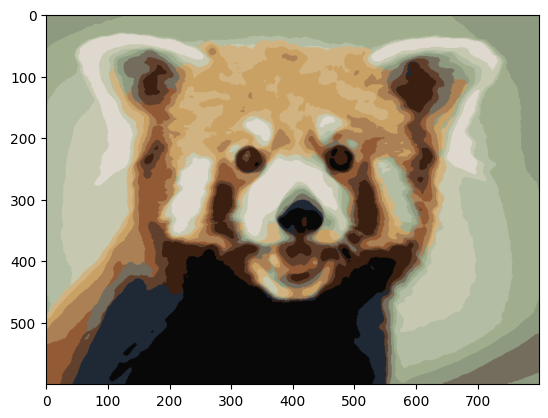

In [19]:
plt.imshow(q_img)

### The pruning process can take a while to run, especially if using bilateral filters, but can be sped up by downsampling the input and upsampling the output

Quantized to 100 colors


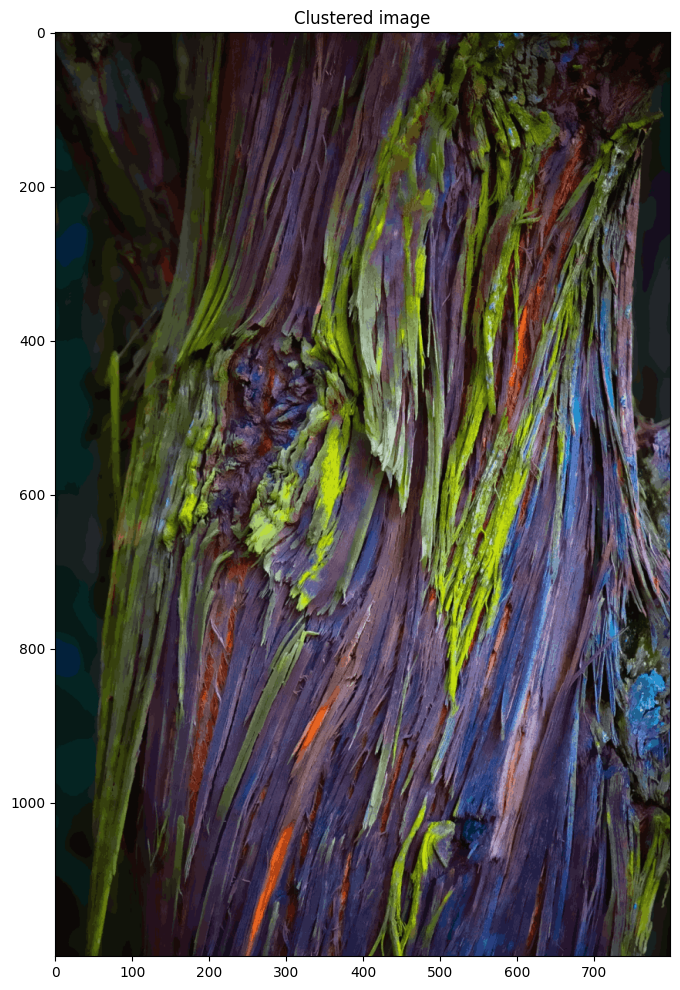

rawStats:
{(3, 33, 59): 150, (5, 36, 34): 20, (7, 26, 23): 59, (12, 8, 6): 475, (17, 19, 10): 716, (22, 14, 30): 895, (23, 32, 31): 516, (26, 11, 9): 1385, (27, 21, 18): 1852, (28, 46, 97): 460, (29, 31, 10): 1372, (32, 97, 145): 215, (34, 31, 69): 1364, (34, 38, 42): 1161, (37, 17, 28): 2347, (38, 22, 47): 2182, (38, 34, 23): 2477, (40, 63, 126): 500, (40, 142, 203): 37, (42, 17, 13): 1296, (43, 48, 10): 1579, (47, 42, 79): 2371, (48, 48, 28): 2393, (49, 26, 32): 3249, (49, 35, 60): 3201, (53, 32, 45): 3994, (53, 54, 43): 2466, (53, 55, 97): 1858, (54, 64, 14): 1912, (58, 46, 69): 3907, (62, 71, 32): 2079, (64, 50, 84): 3674, (64, 66, 54): 2559, (65, 43, 52): 3882, (65, 67, 112): 2046, (66, 78, 138): 855, (66, 83, 14): 1398, (67, 40, 33): 2069, (67, 104, 162): 587, (68, 72, 74): 2429, (69, 22, 14): 653, (72, 60, 96): 3482, (72, 82, 49): 2305, (73, 52, 67): 3643, (76, 101, 121): 903, (80, 99, 36): 1581, (82, 61, 81): 3321, (82, 101, 13): 1227, (83, 86, 89): 2635, (84, 52, 48): 1826, (8

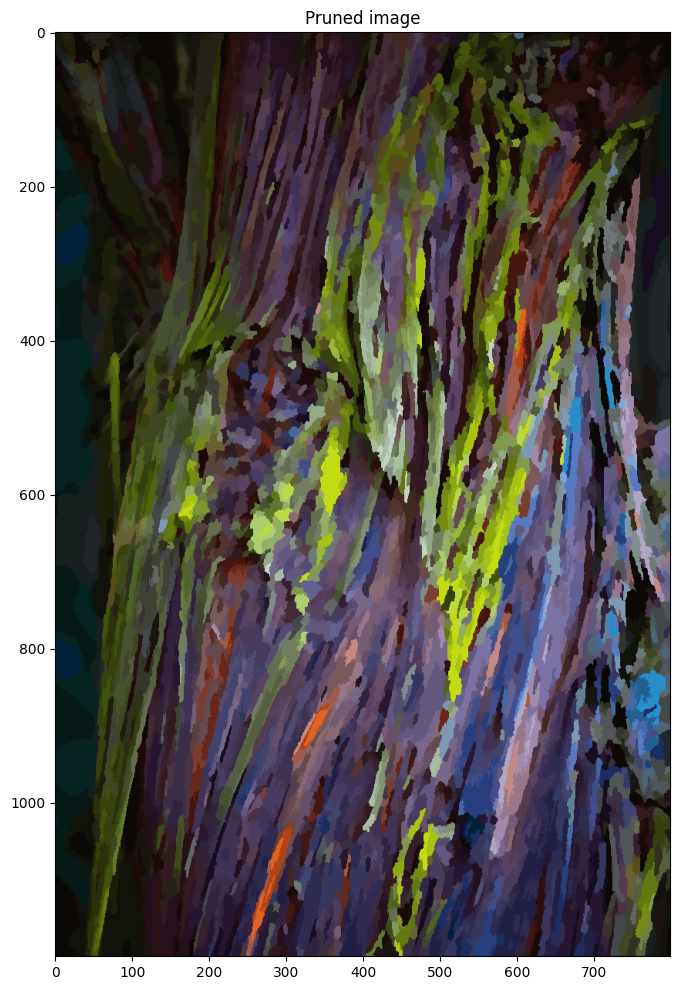

rawStats:
{(3, 33, 59): 5, (5, 36, 34): 9, (7, 26, 23): 10, (12, 8, 6): 62, (17, 19, 10): 31, (22, 14, 30): 28, (23, 32, 31): 19, (26, 11, 9): 91, (27, 21, 18): 58, (28, 46, 97): 16, (29, 31, 10): 45, (32, 97, 145): 5, (34, 31, 69): 30, (34, 38, 42): 23, (37, 17, 28): 66, (38, 22, 47): 55, (38, 34, 23): 64, (40, 63, 126): 17, (40, 142, 203): 6, (42, 17, 13): 57, (43, 48, 10): 35, (47, 42, 79): 41, (48, 48, 28): 45, (49, 26, 32): 93, (49, 35, 60): 64, (53, 32, 45): 77, (53, 54, 43): 37, (53, 55, 97): 35, (54, 64, 14): 42, (58, 46, 69): 63, (62, 71, 32): 49, (64, 50, 84): 48, (64, 66, 54): 45, (65, 43, 52): 63, (65, 67, 112): 37, (66, 78, 138): 22, (66, 83, 14): 43, (67, 40, 33): 44, (67, 104, 162): 20, (68, 72, 74): 34, (69, 22, 14): 31, (72, 60, 96): 61, (72, 82, 49): 39, (73, 52, 67): 62, (76, 101, 121): 16, (80, 99, 36): 26, (82, 61, 81): 59, (82, 101, 13): 30, (83, 86, 89): 42, (84, 52, 48): 34, (84, 75, 113): 43, (84, 95, 64): 44, (85, 77, 26): 26, (88, 67, 97): 62, (88, 122, 193):

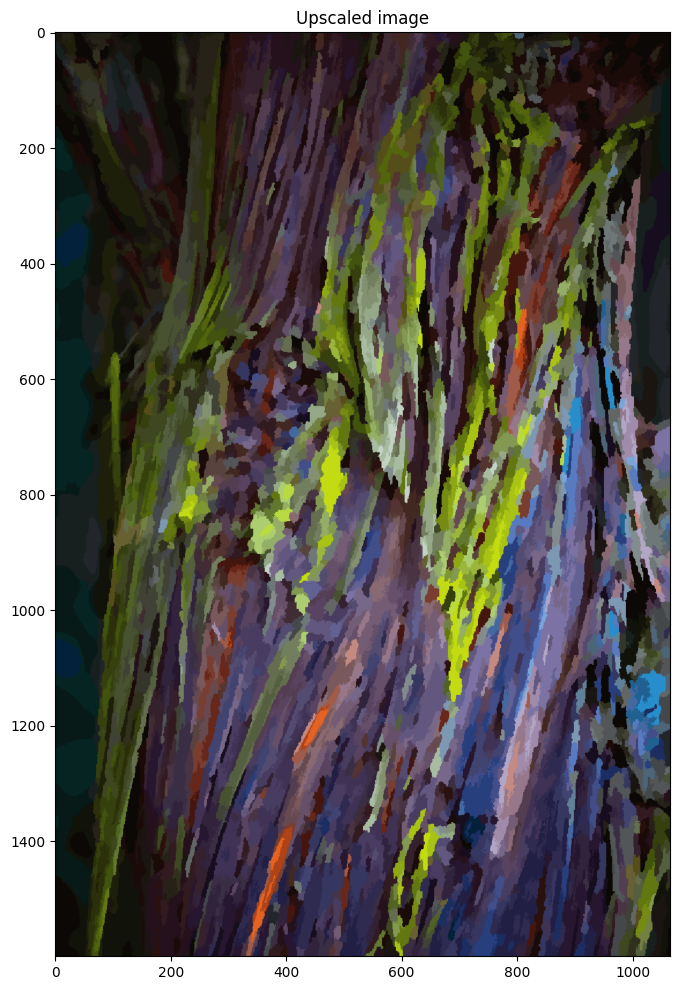

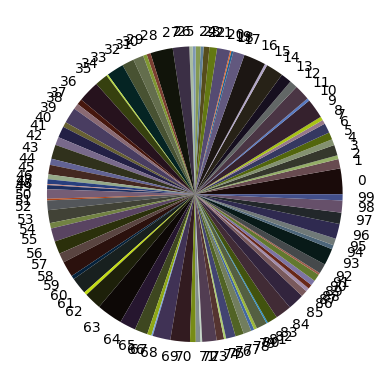

In [39]:
import time

pbn = PbnGen("images/RainbowEucalyptus.jpg", num_colors=100)
# pbn.showImg(title='Original image')

originalDims = pbn.getImage().shape[:-1]

pbn.blurImage_(blurType='bilateral', ksize=21, sigmaColor=21, sigmaSpace=14)
# pbn.showImg(title='Filtered image')

pbn.resizeImage_(0.75)
# pbn.showImg(title='Scaled image')

pbn.cluster_colors_()
pbn.showImg(title='Clustered image')

(rawStats, prunedStats, remainingStats, reductionFactors, 
 totalRawClusters, totalPrunedClusters, totalReduction) = pbn.getClusteringEffectiveness()
print(f'rawStats:\n{rawStats}')
print(f'prunedStats:\n{prunedStats}')
print(f'remainingStats:\n{remainingStats}')
print(f'reductionFactors:\n{reductionFactors}')
print(f'totalRawClusters: {totalRawClusters}')
print(f'totalPrunedClusters: {totalPrunedClusters}')
print(f'Remaining clusters: {totalRawClusters-totalPrunedClusters}')
print(f'totalReduction: {totalReduction}%')

startTime = time.time()
pbn.pruneClustersSimple(iterations=6, trySlow=False)
print(f'Total pruning time: {time.time()-startTime}')
pbn.showImg(title='Pruned image')

(rawStats, prunedStats, remainingStats, reductionFactors, 
 totalRawClusters, totalPrunedClusters, totalReduction) = pbn.getClusteringEffectiveness()
print(f'rawStats:\n{rawStats}')
print(f'prunedStats:\n{prunedStats}')
print(f'remainingStats:\n{remainingStats}')
print(f'reductionFactors:\n{reductionFactors}')
print(f'totalRawClusters: {totalRawClusters}')
print(f'totalPrunedClusters: {totalPrunedClusters}')
print(f'Remaining clusters: {totalRawClusters-totalPrunedClusters}')
print(f'totalReduction: {totalReduction}%')

pbn.resizeImage_(dimension=originalDims)
pbn.showImg(title='Upscaled image')

pbn.plt_cluster_pie()